In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [83]:
raw_data_train = pd.read_csv('../Data/Housing Prices-Regression/train.csv')
raw_data_test = pd.read_csv('../Data/Housing Prices-Regression/test.csv')

In [84]:
raw_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
raw_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [86]:
x_train = raw_data_train.loc[:,:'SaleCondition']
y = raw_data_train.loc[:,'SalePrice':]

In [87]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [88]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [89]:
x = pd.concat([x_train, raw_data_test])

In [90]:
print("x_train:",x_train.shape,"|| raw_data_test", raw_data_test.shape)
print("x :",x.shape)
print("y :",y.shape)

x_train: (1460, 80) || raw_data_test (1459, 80)
x : (2919, 80)
y : (1460, 1)


### Dropping ID

In [91]:
x = x.drop('Id', axis=1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Numeric Columns

In [92]:
numeric_columns = []
numeric_columns.extend(list(x.dtypes[x.dtypes == np.int64].index))
numeric_columns.extend(list(x.dtypes[x.dtypes == np.float64].index))

In [93]:
print(numeric_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


### Non_numeric columns

In [94]:
non_numeric_columns = []
non_numeric_columns = [col for col in list(x.columns) if col not in numeric_columns]

In [95]:
print(non_numeric_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Missing Data

In [96]:
x.isnull().values.any()

True

In [97]:
for col in numeric_columns:
    x[col].fillna(0, inplace = True)

In [98]:
x.isnull().values.any()

True

In [99]:
for col in non_numeric_columns:
    x[col].fillna("NIL", inplace = True)

In [100]:
x.isnull().values.any()

False

### String -> Int

In [101]:
x.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [102]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in non_numeric_columns:
    x[col] = encoder.fit_transform(x[col])

In [103]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,9,4
1,20,4,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,9,4
2,60,4,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,9,4
3,70,4,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,9,0
4,60,4,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,9,4


### Normalise

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()


for col in [numeric_columns,non_numeric_columns]:
    x[col] = scaler.fit_transform(x[col])
    
y[['SalePrice']] = scaler1.fit_transform(y[['SalePrice']])    

In [105]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.207668,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.255591,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.217252,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.191693,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.268371,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


In [106]:
y.head()

,SalePrice
0,0.241078
1,0.203583
2,0.261908
3,0.145952
4,0.298709


### Split test and train data

In [120]:
x_train = x.iloc[:1460, :]
x_test = x.iloc[1460:,:]

In [121]:
x_train.shape

(1460, 79)

In [122]:
x_test.shape

(1459, 79)

### Convert to tensor

In [123]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

In [124]:
print("x_train:",x_train_tensor.shape, "y_train: ",y_train_tensor.shape,"\nx_test:" ,x_test_tensor.shape)

x_train: torch.Size([1460, 79]) y_train:  torch.Size([1460, 1]) 
x_test: torch.Size([1459, 79])


### Model

In [133]:
class Network(nn.Module):
    def __init__(self, n_input, h1, h2, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, h1)
        self.l2 = nn.Linear(h1, h2)
        self.l3 = nn.Linear(h2,n_output)
        
    def forward(self, x):
        y = self.l1(x).clamp(min=0)
        y = self.l2(y).clamp(min=0)
        y = self.l3(y)
        return y

In [137]:
h1, h2 = 200, 100
n_input, n_output = x_train_tensor.shape[1], y_train_tensor.shape[1]

In [138]:
model = Network(n_input, h1, h2, n_output)
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [140]:
losses = []
epochs = 500

for e in range(1, epochs+1):
    
    y_pred = model(x_train_tensor)
    
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss)
    if e%10==0:
        print(f"epoch: {e} ===> loss: {loss}")
        
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch: 10 ===> loss: 5.129713535308838
epoch: 20 ===> loss: 4.730343818664551
epoch: 30 ===> loss: 4.391852855682373
epoch: 40 ===> loss: 4.110644340515137
epoch: 50 ===> loss: 3.880783796310425
epoch: 60 ===> loss: 3.674185037612915
epoch: 70 ===> loss: 3.495370626449585
epoch: 80 ===> loss: 3.3418354988098145
epoch: 90 ===> loss: 3.2099194526672363
epoch: 100 ===> loss: 3.0926320552825928
epoch: 110 ===> loss: 2.990704298019409
epoch: 120 ===> loss: 2.9014062881469727
epoch: 130 ===> loss: 2.8209099769592285
epoch: 140 ===> loss: 2.748365879058838
epoch: 150 ===> loss: 2.6825313568115234
epoch: 160 ===> loss: 2.621814727783203
epoch: 170 ===> loss: 2.5655112266540527
epoch: 180 ===> loss: 2.5132269859313965
epoch: 190 ===> loss: 2.464240074157715
epoch: 200 ===> loss: 2.4173643589019775
epoch: 210 ===> loss: 2.372138500213623
epoch: 220 ===> loss: 2.32877779006958
epoch: 230 ===> loss: 2.286872625350952
epoch: 240 ===> loss: 2.2464447021484375
epoch: 250 ===> loss: 2.2069740295410156

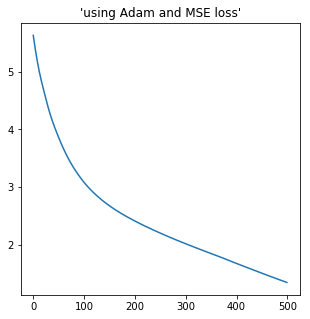

In [148]:
plt.figure(figsize=(5,5))
plt.plot(range(len(losses)), losses)
plt.title("'using Adam and MSE loss'")
plt.show()

### testing

In [149]:
y_test_pred = model(x_test_tensor)

In [151]:
result = pd.DataFrame(y_test_pred.data.numpy(), columns=['SalePrice'])

In [153]:
result.isnull().values.any()

False

In [154]:
result.head()

,SalePrice
0,0.128794
1,0.153042
2,0.189760
3,0.198388
4,0.197709
